<a href="https://colab.research.google.com/github/revati2013/Assignment04_Simple-Linear-Regression/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf


In [ ]:
d=pd.read_csv('delivery_time.csv')
d

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
data=d.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
#data visualization and EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


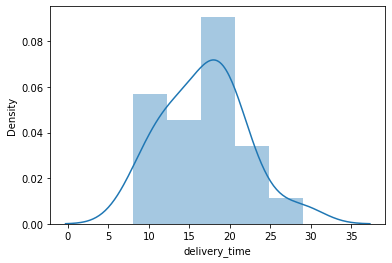

In [ ]:
sns.distplot(data['delivery_time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


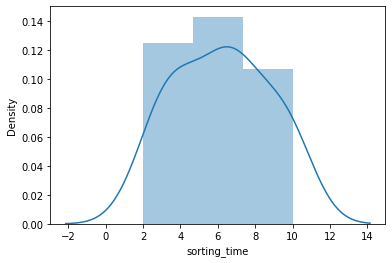

In [ ]:
sns.distplot(data['sorting_time'])

In [ ]:
#correlation analysis
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


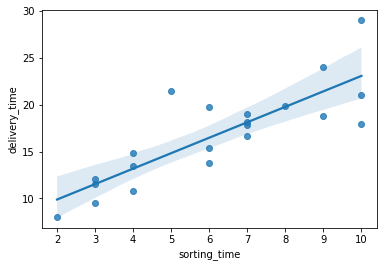

In [ ]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

In [ ]:
#building model
model=smf.ols("delivery_time~sorting_time", data=data).fit()

In [ ]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [ ]:
#finding tvalue and pvalue
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64, Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [ ]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [ ]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [ ]:
# Automatic Prediction for say sorting time 4,7
new_data=pd.Series([4,7])
new_data

0    4
1    7
dtype: int64

In [ ]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,4
1,7


In [ ]:
model.predict(data_pred)

0    13.178814
1    18.125873
dtype: float64